**Name** : Poonam Raosaheb Wagh

**Roll No** : B1951020

**PRN** : 72018648L

**Class** : BE IT A

# Importing Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

# Loading and preparing the data

In [4]:
#import dataset and split into train and test 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

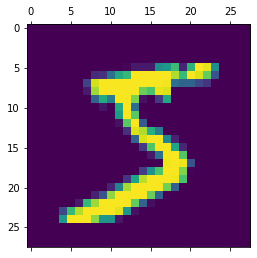

In [11]:
#to see how first image looks
plt.matshow(x_train[0])

In [12]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

# Creating the Model

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [16]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [17]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6522 - accuracy: 0.8363 - val_loss: 0.3547 - val_accuracy: 0.9041
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3354 - accuracy: 0.9068 - val_loss: 0.2931 - val_accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2876 - accuracy: 0.9189 - val_loss: 0.2598 - val_accuracy: 0.9264
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2590 - accuracy: 0.9276 - val_loss: 0.2383 - val_accuracy: 0.9336
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2372 - accuracy: 0.9336 - val_loss: 0.2248 - val_accuracy: 0.9365
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2196 - accuracy: 0.9380 - val_loss: 0.2070 - val_accuracy: 0.9405
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2046 - accuracy: 0.9432 - val_loss: 0.1943 - val_accuracy:

# Evaluate the Model

In [19]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1642 - accuracy: 0.9522
Loss = 0.164
Accuracy = 0.952


# Making Prediction on New Data

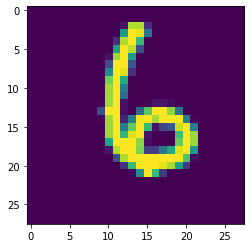

In [23]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [25]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 960    0    1    2    0    5    7    2    2    1]
 [   0 1115    3    2    1    1    3    2    8    0]
 [   8    1  981    8    7    1    8    7    9    2]
 [   0    0   10  960    1   15    0   10    8    6]
 [   1    0    4    0  936    0    9    3    5   24]
 [   9    1    2   19    4  833   11    0    8    5]
 [   9    3    5    1   10   11  916    1    2    0]
 [   1    6   18    6    5    2    0  966    3   21]
 [   5    1    6   16    7   10   13    8  900    8]
 [   6    6    1   11   17    3    1    7    2  955]], shape=(10, 10), dtype=int32)
